# Analysis of the Income Dataset
## Nick Heise
### December 2018

<ol>
    <li>Introduction</li>
    <li>Reading and Cleaning of Dataset</li>
    <li>Generating Feature Plots</li>
    <ol>
            <li>Continuous Numerical Data</li>
            <li>Categorical Data</li>
    </ol>
    <li>Discussion</li>
    <ol>
        <li>Continuous Features</li>
        <ol>
            <li>Age</li>
            <li>Capital Gains</li>
            <li>Federal Income Tax Liability</li>
            <li>Correlation Heatmap of Continuous Numerical Data</li>
        </ol>
        <li>Categorical Data</li>
        <ol>
            <li>Sex</li>
            <li>Education</li>
            <li>Major Occupation Code</li>
            <li>"Null" values in the dataset</li>
        </ol>
    </ol>
    
</ol>    

## 1. Introduction

<p>This is the one of two jupyter notebooks I've done for this project. This notebook focuses on the analysis of the data given in the income dataset, while the other notebook (prediction_notebook.ipynb) does manipulation of the data, training of machine learning models, feature selection, and model selection.</p>
<p>This analytical notebook generates various plots to visualize the data, and includes a discussion of these visualizations.</p>

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

pd.set_option('display.max_columns', None)
sns.set_palette(palette=sns.color_palette('colorblind'))

## 2. Reading and Cleaning of Dataset

<p>The dataset given was scraped without column names. Fortunately, we have been given a metadeta document detailing the various columns, their data types, and their values. We'll use the columns provided in this document to properly set the columns.</p>
<p>Note that original income-related columns were removed, and the binary 'income' column was added. Further, as detailed in the metadeta document, 'instance_weight' should not be used for classification and is therefore removed.<p>

In [2]:
train_df =  pd.read_csv('census_income_learn.csv')
test_df = pd.read_csv('census_income_test.csv')

column_names = ['age', 'class_of_worker', 'industry_code', 'occupation_code',
                'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk',
                'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 
                'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 
                'full_or_part_time_employment_stat', 'capital_gains', 'dividends_from_stocks',
                'federal_income_tax_liability', 'tax_filer_status', 'region_of_previous_residence', 
                'state_of_previous_residence', 'detailed_household_and_family_stat', 
                'detailed_household_summary_in_household', 'instance_weight',
                'migration_code_change_in_msa', 'migration_code_change_in_reg', 
                'migration_code_move_within_reg', 'live_in_this_house_1yr_ago', 
                'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
                'family_persons_under_18', 'country_of_birth_father', 
                'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 
                'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 
                'veterans_benefits', 'weeks_worked_in_year', 'year', 'income']

# add column names and drop instance_weight
for df in [train_df, test_df]:
    df.columns = column_names
    df.drop(labels='instance_weight', axis='columns', inplace=True)

<p>We'll examine if there are any null values in the dataset.</p>

In [3]:
train_df.isnull().sum()

age                                          0
class_of_worker                              0
industry_code                                0
occupation_code                              0
education                                    0
wage_per_hour                                0
enrolled_in_edu_inst_last_wk                 0
marital_status                               0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
dividends_from_stocks                        0
federal_income_tax_liability                 0
tax_filer_status                             0
region_of_previous_residence                 0
state_of_prev

<p>We can see that there are no null values. However, there are notably values in each column that represent null but are not null-type. These are given by values such as 'Not in universe', some variant of 'Not in universe', or '?'.</p>
<p>These values are included only under categorical features. An effective way of dealing with null values in categorical features is often to simply assign a category corresponding to null; since this is already done in this dataset, no further action is needed.</p>
<p>We can see from the head of the dataset that the data has been read and cleaned correctly now.</p>

In [4]:
train_df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,dividends_from_stocks,federal_income_tax_liability,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1yr_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_persons_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


In [5]:
print('Training set has {} samples, with {} columns.'.format(train_df.shape[0], train_df.shape[1]))
print('Test set has {} samples, with {} columns.'.format(test_df.shape[0], test_df.shape[1]))

Training set has 199522 samples, with 41 columns.
Test set has 99761 samples, with 41 columns.


<p>The target column for this dataset, 'income', contains a string value: '-50000' or '50000+'. In reality, we want this column be a binary value where 1 corresponds to the person earning over 50,000 dollars, and 0 corresponds to earning less. Here we encode the values accordingly:</p>

In [6]:
enc = LabelEncoder()
for df in [train_df, test_df]:
    df['over_50k_income'] = enc.fit_transform(df['income'])
    df.drop(labels='income', axis='columns', inplace=True)

<p>We want to have an idea of the distribution of these 'over_50k_income' values so that we can have a baseline by which to judge our predictions. We notice that about 93.8% of the samples earn less than 50k. This means that a simple predictor that predicts 0 for all samples would have 93.8% accuracy, so our machine learning model should perform better.</p>

In [7]:
print('Training set is {}% people who earn 50K or more.'.format(100*train_df.loc[train_df['over_50k_income'] == 1, 'over_50k_income'].count() /
                                                       train_df.shape[0]))
print('A baseline prediction of all under 50K earners would yield accuracy of {}%.'.format(100*train_df.loc[train_df['over_50k_income'] == 0, 'over_50k_income'].count() /
                                                                                         train_df.shape[0]))
print('Test set is {}% people who earn 50K or more.'.format(100*test_df.loc[train_df['over_50k_income'] == 1, 'over_50k_income'].count() /
                                                       test_df.shape[0]))

Training set is 6.205831938332615% people who earn 50K or more.
A baseline prediction of all under 50K earners would yield accuracy of 93.79416806166739%.
Test set is 6.192800793897415% people who earn 50K or more.


## 3. Generating Feature Plots

<p>We want to be able to visualize each feature in our raw dataset, and understand how the individual's income corresponds to each feature. We can break our data into two groups: continuous numerical and categorical. The plots generated for each feature should depend on the type of data it is so that we can have the most meaningful visualization.</p>

### A. Continuous Numerical Data

<p>Most of the continuous features of this dataset have very irregular distributions. In order to visualize these distributions and understand how income varies based on them, we will generate violin plots. While box plots would also be a useful visualization, we chose violin plots to give a clearer image of how the distribution of a feature differs between over 50k earners and under 50k earners.</p>

In [8]:
# define continuous features
cont_features = ['age', 
                 'wage_per_hour', 
                 'capital_gains', 
                 'dividends_from_stocks',
                 'federal_income_tax_liability', 
                 'num_persons_worked_for_employer',
                 'weeks_worked_in_year']

In [9]:
%%capture

# generate violinplot for each continuous feature and save it
for df in [train_df, test_df]:
    for feature in cont_features:
        plt.cla()
        ax = sns.violinplot(x=feature, y='over_50k_income', orient='h', data=train_df)
        ax.set(title='{} distribution'.format(feature))
        
        # configure axis settings
        ax.title.set_fontsize(15)
        ax.xaxis.label.set_fontsize(15)
        ax.yaxis.label.set_fontsize(15)
        ax.tick_params(labelsize=15)
        plt.tight_layout()
        
        fig = ax.get_figure()
        fig.set_figheight(5)
        fig.set_figwidth(15)
        if not os.path.isdir(os.path.join('plots', 'continuous')): 
            os.makedirs(os.path.join('plots', 'continuous'))
        fig.savefig(os.path.join('plots', 'continuous', '{}_distribution.png'.format(feature)))

<p>We'll also want to generate a correlation heatmap for our continous numerical data.</p>

In [10]:
%%capture
corr_features = cont_features + ['over_50k_income']
corr = train_df[corr_features].corr()

plt.cla()
ax = sns.heatmap(data=corr, cmap=sns.color_palette('coolwarm', 20), center=0)
ax.set(title='correlation heatmap for numerical data')
plt.tight_layout()

# configure axis settings
ax.title.set_fontsize(15)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.tick_params(labelsize=15)
plt.tight_layout()

fig = ax.get_figure()
fig.set_figheight(10)
fig.set_figwidth(15)
if not os.path.isdir(os.path.join('plots', 'continuous')): 
    os.makedirs(os.path.join('plots', 'continuous'))
fig.savefig(os.path.join('plots', 'continuous', 'correlation_heatmap.png'))

### B. Categorical Data

<p>Most of the features in this dataset are categorical. We'll use two simple and effective ways to visualize the categorical data: pie charts and bar graphs.</p>

In [11]:
# define categorical features
categorical_features = ['class_of_worker',
                        'education', 
                        'enrolled_in_edu_inst_last_wk', 
                        'marital_status', 
                        'major_industry_code',
                        'major_occupation_code', 
                        'race', 
                        'hispanic_origin', 
                        'sex', 
                        'member_of_a_labor_union', 
                        'reason_for_unemployment', 
                        'full_or_part_time_employment_stat',
                        'tax_filer_status', 
                        'region_of_previous_residence', 
                        'state_of_previous_residence', 
                        'detailed_household_and_family_stat', 
                        'detailed_household_summary_in_household', 
                        'migration_code_change_in_msa', 
                        'migration_code_change_in_reg', 
                        'migration_code_move_within_reg', 
                        'live_in_this_house_1yr_ago', 
                        'migration_prev_res_in_sunbelt',
                        'family_persons_under_18', 
                        'country_of_birth_father', 
                        'country_of_birth_mother', 
                        'country_of_birth_self', 
                        'citizenship', 
                        'own_business_or_self_employed', 
                        'fill_inc_questionnaire_for_veterans_admin', 
                        'veterans_benefits',
                        'year']

### Pie Charts
<p>Pie charts allow us to visualize the distribution of a categorical feature. Further, we can examine the values in this dataset that correspond to 'null' - namely, 'Not in universe', a variant of 'Not in universe', or '?'.</p>

In [12]:
%%capture

# generate pie chart for each categorical feature and save it
for df in [train_df, test_df]:
    for feature in categorical_features:
        pie = train_df.groupby(feature).count().plot(kind='pie', 
                                            y='age', 
                                            autopct='%1.1f%%', 
                                            figsize=(15, 15), 
                                            fontsize=15)
        fig = pie.get_figure()
        if not os.path.isdir(os.path.join('plots', 'categorical', 'piecharts')): 
            os.makedirs(os.path.join('plots', 'categorical', 'piecharts'))
        fig.savefig(os.path.join('plots', 'categorical', 'piecharts', '{}_piechart.png'.format(feature)))

### Bar Graphs
<p>Bar graphs give us a good understanding of how the income relates to the categories in each categorical feature. We generate bar graphs to show the fraction of members of those category who make over 50k.</p>
<p>Note: it can take a while to generate all of these bar graphs.</p>

In [13]:
%%capture

# generate bar graph for each categorical feature and save it
for df in [train_df, test_df]:
    for feature in categorical_features:
        # encode the categories so that they can be plotted
        df[feature] = enc.fit_transform(df[feature])
        
        plt.cla()
        ax = sns.barplot(x='over_50k_income', y=feature, orient='h', data=train_df)
        ax.set(title='fraction of {} with over 50K income'.format(feature), 
               yticklabels=enc.classes_)
        
        # configure axis settings
        ax.title.set_fontsize(15)
        ax.xaxis.label.set_fontsize(15)
        ax.yaxis.label.set_fontsize(15)
        ax.tick_params(labelsize=15)
        plt.tight_layout()
    
        # get figure and save image
        fig = ax.get_figure()
        fig.set_figheight(15)
        fig.set_figwidth(15)
        if not os.path.isdir(os.path.join('plots', 'categorical', 'barplots')): 
            os.makedirs(os.path.join('plots', 'categorical', 'barplots'))
        fig.savefig(os.path.join('plots', 'categorical', 'barplots', '{}_barplot.png'.format(feature)))

## 4. Discussion

<p>We'll now discuss some observations from the visualizations produced above. Only a few key features will be discussed, but I will point out some interesting observations from the most impactful ones in order to extract some insights about the dataset. All plots can be accessed by their saved file if needed for further analysis.</p>

### A. Continuous Features

#### a. Age

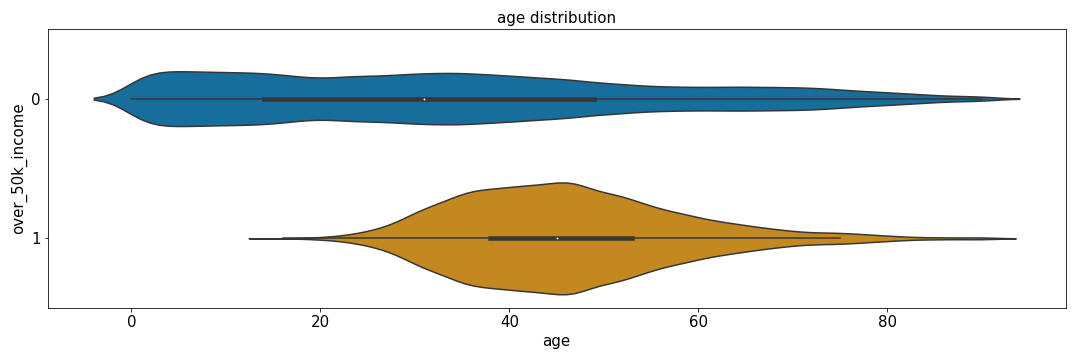

In [14]:
Image(filename='plots/continuous/age_distribution.png', width=1000)

<p>We notice that, for earners of more than 50k, age is concentrated towards the 40-45 range. For those who earn less than 50k, age is more evenly distributed but also skewed to the left. This makes sense intuitively - those in their early 40s are likely working and well-progressed in their career, while those who are young do not have the experience or job stability to earn over 50k. Older populations over the age of 65 also are less likely to earn over 50k, as they retire around that age.</p>

#### b. Capital Gains

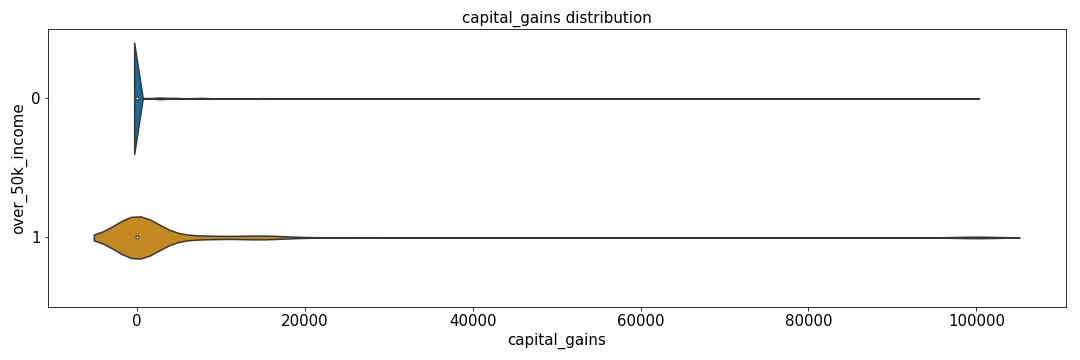

In [15]:
Image(filename='plots/continuous/capital_gains_distribution.png', width=1000)

<p>For this population, capital gains are generally concentrated around 0 as most individuals in the dataset have no capital gains at all. However, we can see that capital gains for over 50k earners is more widely distributed, indicating that those who do have capital gains are more likely to be part of this group. Notably, when the models were trained, the gradient boosting algorithm which obtained the best accuracy considers this feature the most important.</p>

#### c. Federal Income Tax Liability

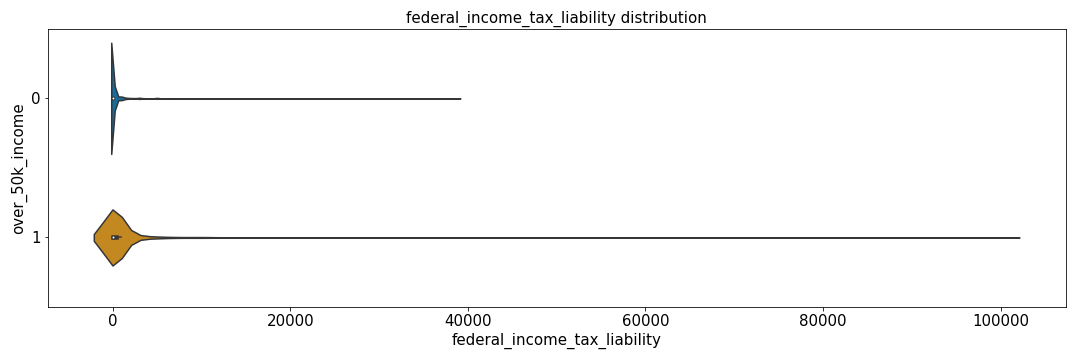

In [16]:
Image(filename='plots/continuous/federal_income_tax_liability_distribution.png', width=1000)

<p>The federal income tax liability feature has similar distributions to those of capital gains, similarly indicating that those who do have federal income tax liability are more likely to be in the over 50k earners group. Given that this feature describes the amount of taxes owed, it makes that those who owe more in taxes make more money since taxes are a percentage of earnings that increases as earnings increase. This feature was given the second-highest importance by the gradient boosting algorithm.</p>

#### d. Correlation Heatmap of Continuous Numerical Data

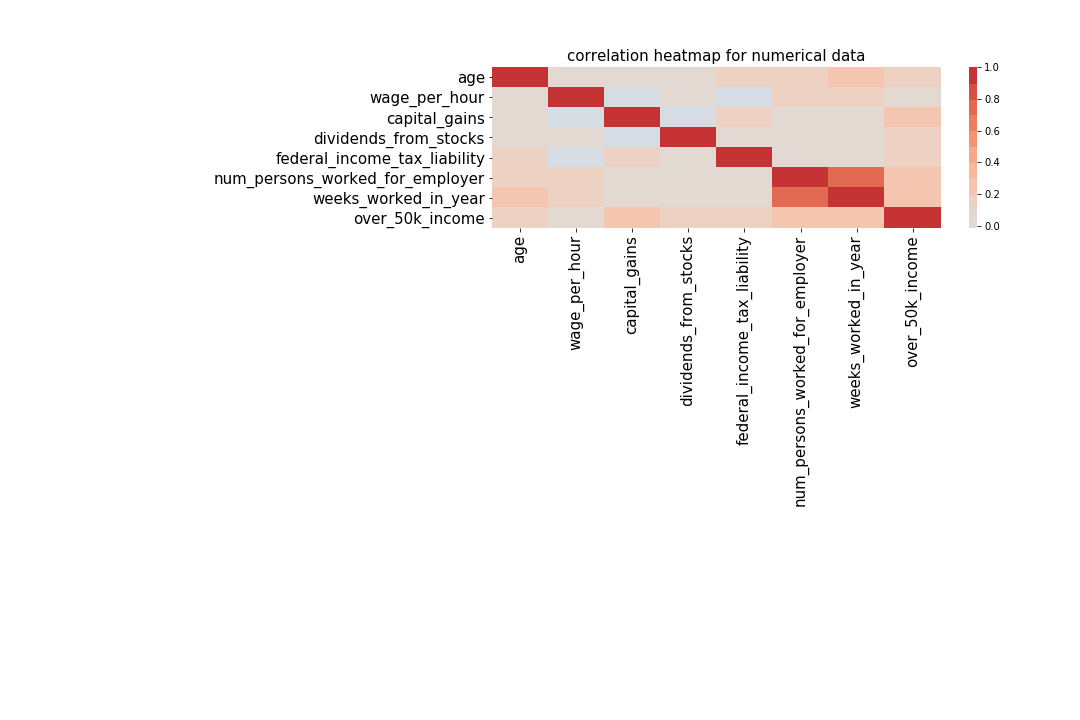

In [17]:
Image(filename='plots/continuous/correlation_heatmap.png', width=700)

<p>We can see the correlation between the over 50k income group and the other features in the bottom row of the heatmap. Noticeably, the correlation values are low. This, however, does not mean that the values are not related. The correlation matrix here describes linear correlation, and we have noticed that the continuous data in this dataset have nonlinear relationships with the income prediction. For example, likelihood of being an over 50k earner does not linearly increase with age but is highest at middle ages and low at older or younger ages.</p>

### B. Categorical Features

#### a. Sex

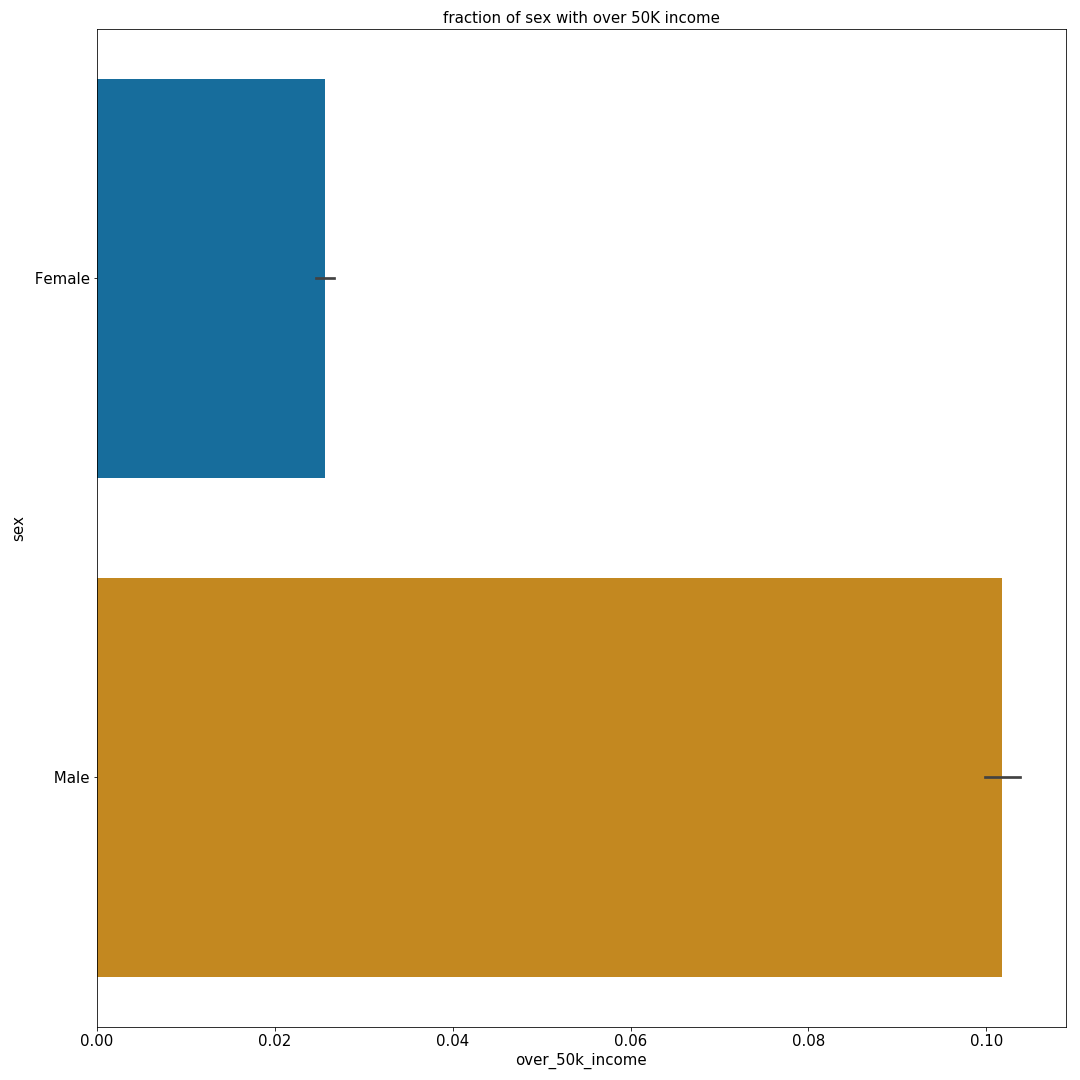

In [18]:
Image(filename='plots/categorical/barplots/sex_barplot.png', width=500)

<p>It is a popular topic of political and cultural discussion today that women earn less money than men. For this dataset, we see that male individuals are about three times as likely to earn over 50k than female individuals. There are many potential reasons for this, which are out of the scope of this analysis. The gradient boosting algorithm gives this feature a very high importance, with the one-hot encoding for 'female' as 4th-highest and the encoding for 'male' as 8th highest.</p>

#### b. Education

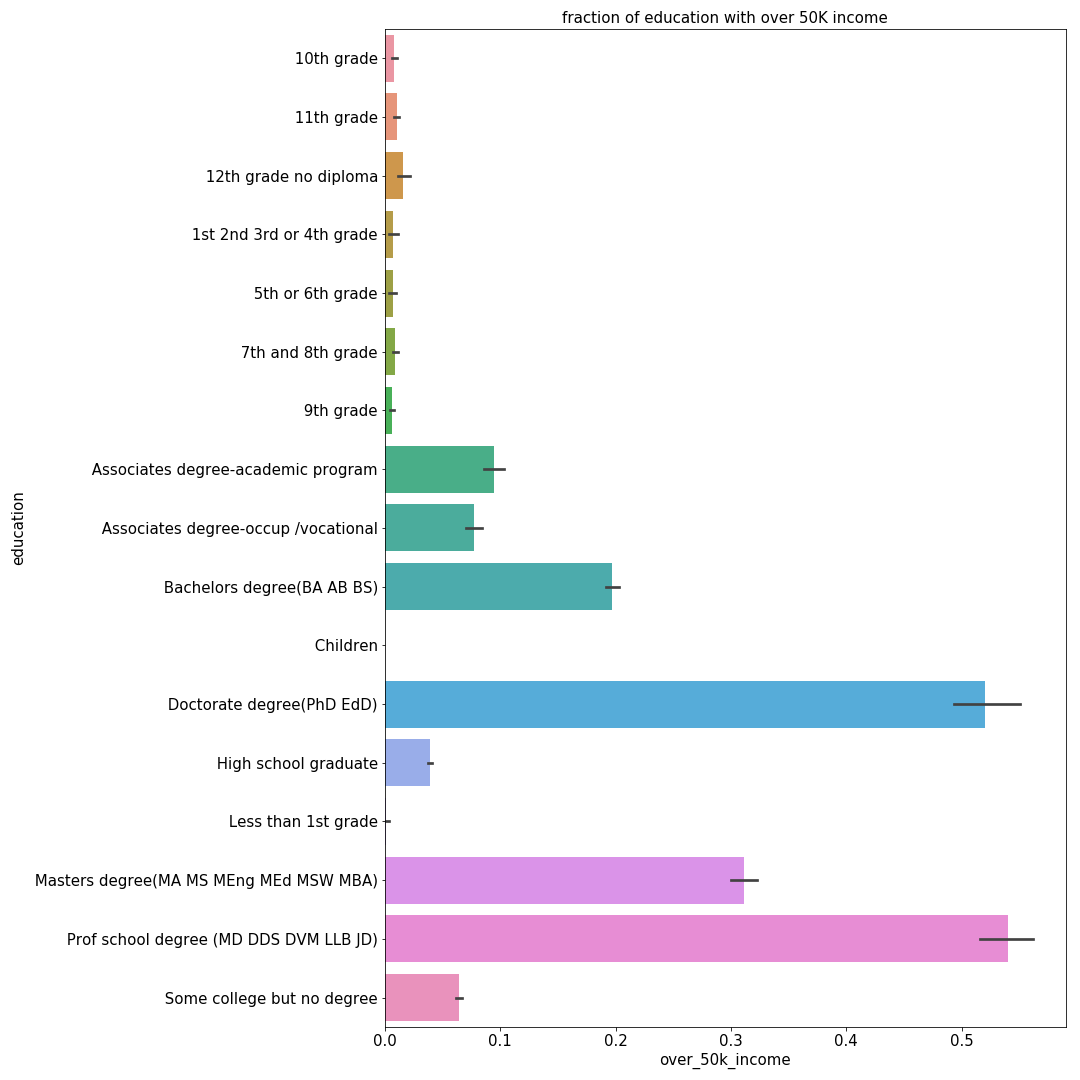

In [19]:
Image(filename='plots/categorical/barplots/education_barplot.png', width=500)

<p>Education has a huge impact on potential earnings later in life. We see here that, overall, as education level increases there is also an increase in the likelihood of earning over 50k. Particularly, those who have a professional degree were the most likely to earn over 50k. This is likely because those who attend professional programs go on to be doctors, lawyers, dentists, and other professions with very high salaries.</p>

#### c. Major Occupation Code

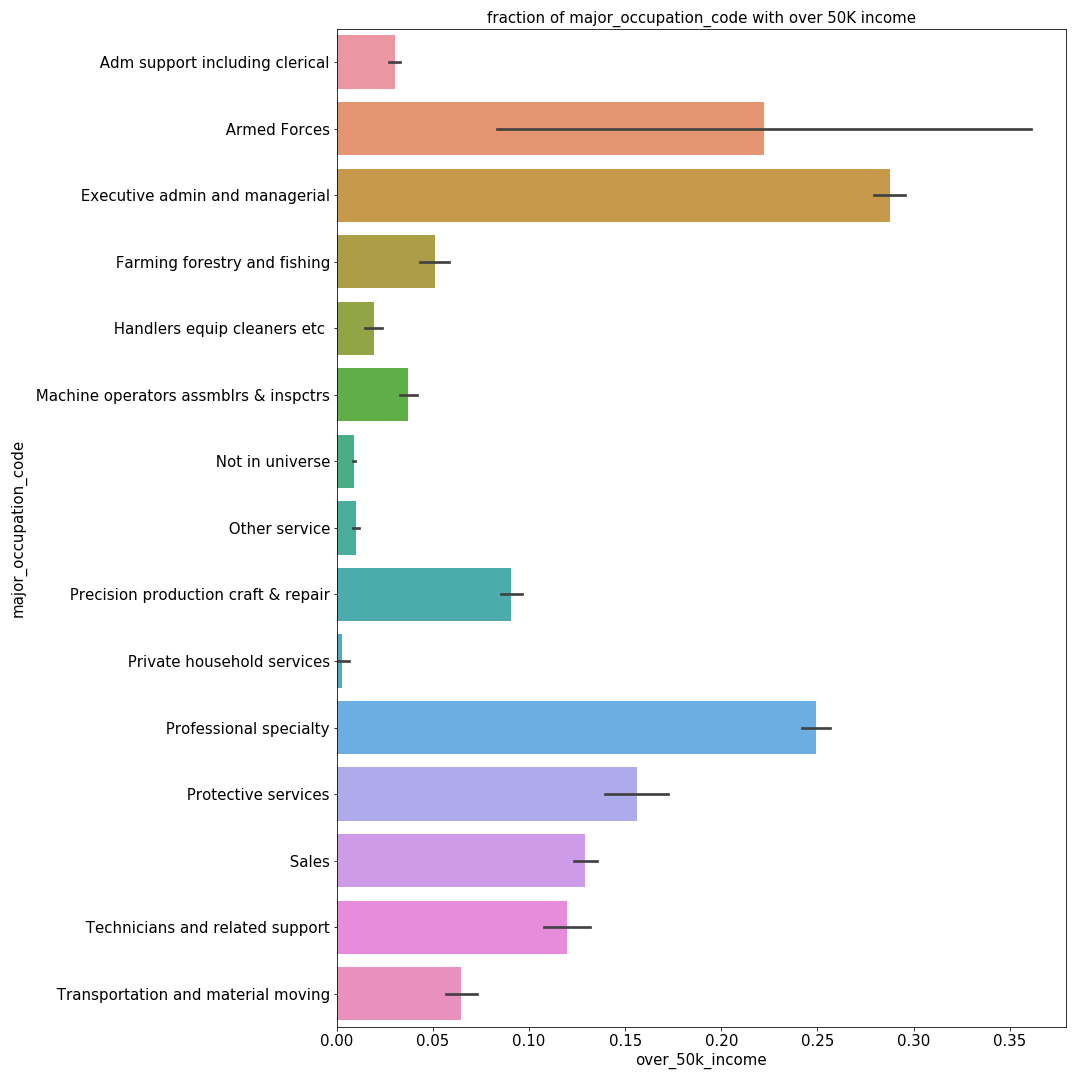

In [20]:
Image(filename='plots/categorical/barplots/major_occupation_code_barplot.png', width=500)

<p>Of course, an individual's occupation will have an important role in their income. Understandably, those who fall in the category of executive, administrative, and mananagerial roles tend to have higher incomes due to the higher rank of their occupation. Further, those in professional specialties are likely to be high earners as well. The one-hot encodings for 'executive admin and managerial' and 'professional specialty' categories were the 7th and 9th most important features in gradient boosting, respectively.</p>

#### d. "Null" values in the dataset

<p>While it was mentioned at the beginning of this analysis that there are no null values in the dataset, it is important to note the distribution of certain categories. Many categories contain values such as "not in universe" or "?", which are representative of null values but with different meaning. Observe the pie chart for the class of worker feature:</p>

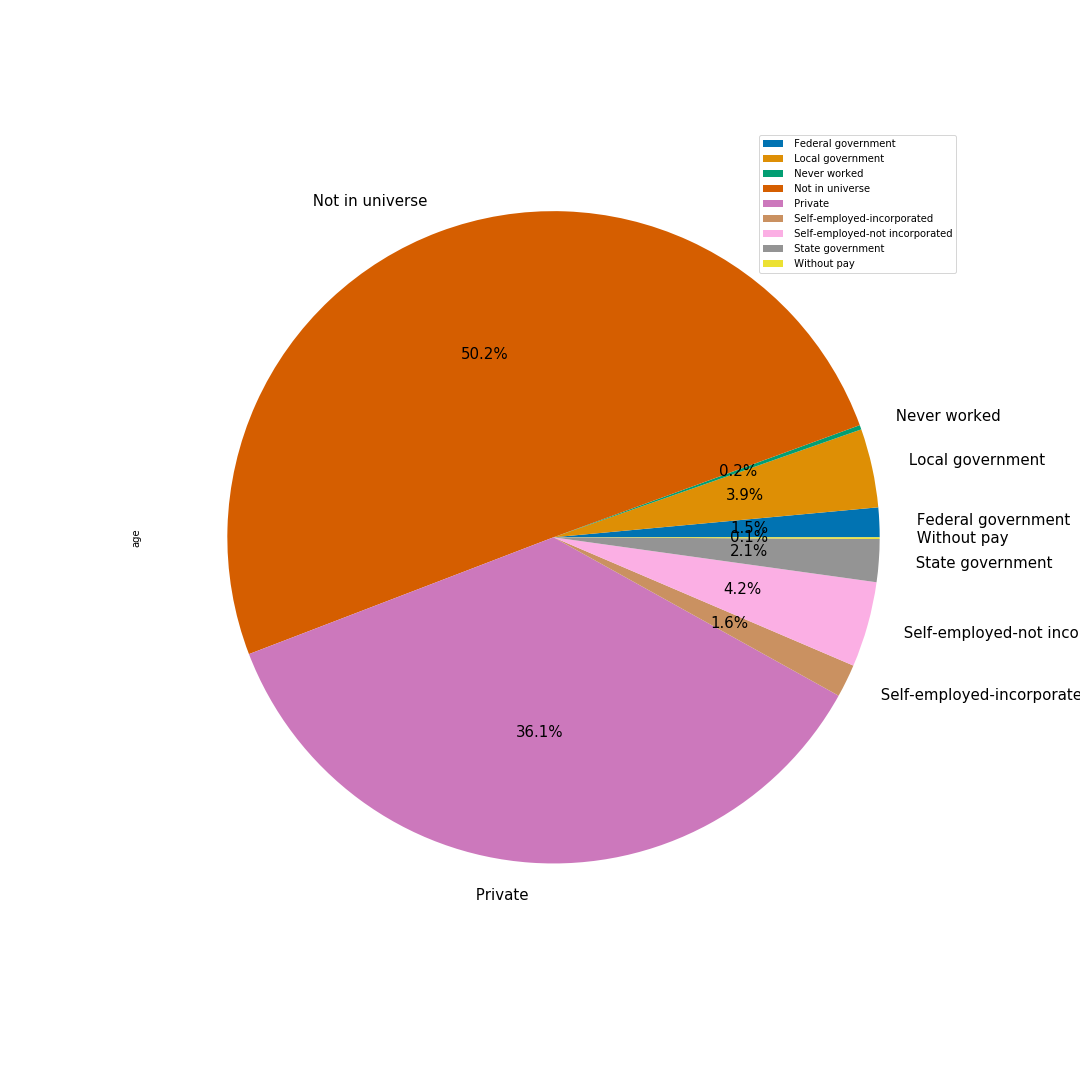

In [21]:
Image(filename='plots/categorical/piecharts/class_of_worker_piechart.png', width=700)

<p>About 50% of the values in the 'class_of_worker' feature are 'not in universe', which means that they do not belong to any worker class. This is important information to retain, as it indicates that they do not belong to any of the other categories listed. This is also the case for the other categorical data features, and is why we leave them as-is for the training of the machine learning model.</p>

## 5. Conclusion

<p>The data included in the income dataset has been organized and cleaned, and we have generated visualizations which describe the distribution of each feature as well as relationships between each feature and the target 'over_50k_income'. Further, we explored some of the most influential features as determined by the machine learning model and gathered some insights from those features.</p>
<p>All plots and figures have been saved for further analysis if needed.</p>